In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/home/brian/dataset/sorghum/train_cultivar_mapping.csv')
df

,image,cultivar
0,2017-06-21__11-32-09-227.png,PI_152923
1,2017-06-27__10-36-57-694.png,PI_152923
2,2017-06-13__12-10-43-125.png,PI_152923
3,2017-06-03__12-37-57-818.png,PI_152923
4,2017-06-03__12-37-24-028.png,PI_152923
...,...,...
22630,2017-06-04__13-32-11-825.png,PI_152967
22631,2017-06-04__13-33-43-417.png,PI_152967
22632,2017-06-20__12-19-56-066.png,PI_152967
22633,2017-06-09__12-51-11-655.png,PI_152967


In [7]:
counts = df.groupby('cultivar').size().reset_index(name='counts')
counts

,cultivar,counts
0,PI_144134,242
1,PI_145619,236
2,PI_145626,158
3,PI_145633,240
4,PI_146890,235
...,...,...
95,PI_329351,239
96,PI_35038,224
97,PI_52606,259
98,PI_63715,233


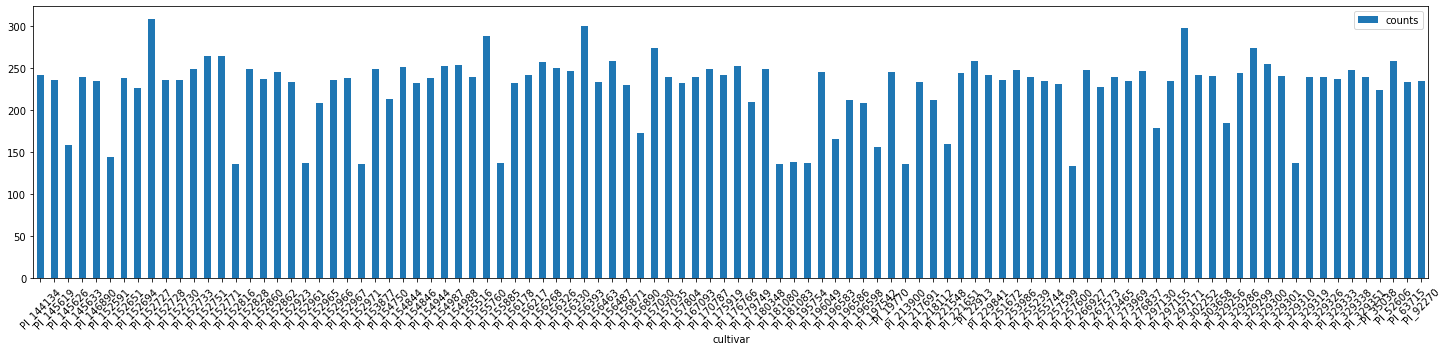

In [38]:
ax = counts.plot.bar(x='cultivar', y='counts', rot=45, figsize=(25,5))

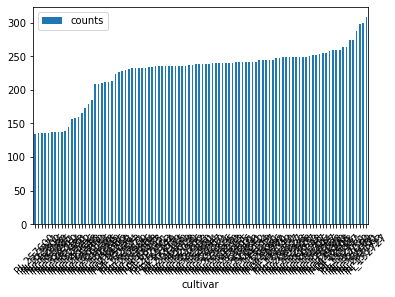

In [13]:
ax = counts.sort_values(by='counts').plot.bar(x='cultivar', y='counts', rot=45)

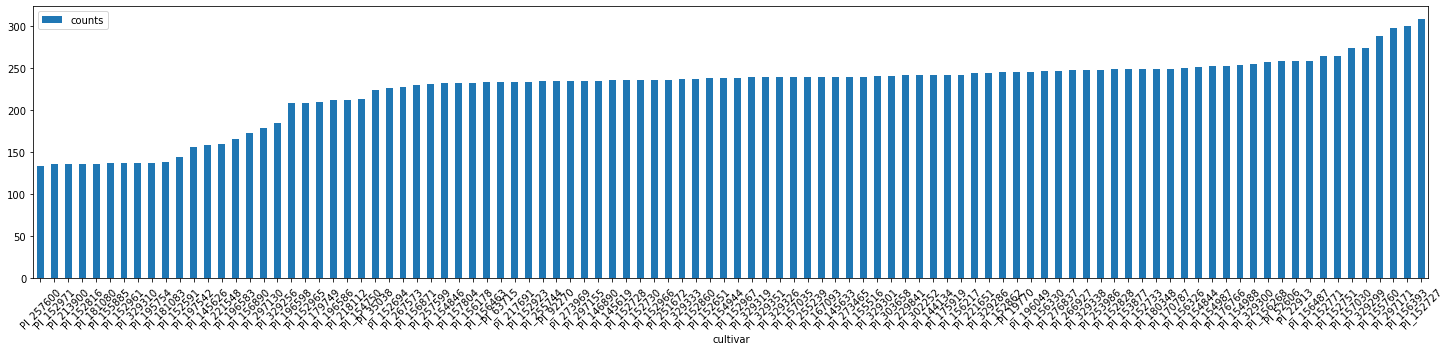

In [37]:
ax = counts.sort_values(by='counts').plot.bar(x='cultivar', y='counts', rot=45, figsize=(25,5))

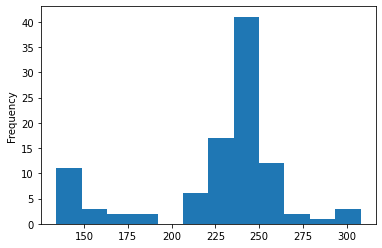

In [17]:
ax = counts['counts'].plot.hist(bins=12)

In [29]:
print('Mean Count: {:.2f}'.format(np.mean(counts['counts'])))
print('StDev Count: {:.2f}'.format(np.std(counts['counts'])))

Mean Count: 226.35
StDev Count: 40.24


The cultivars with the most sample images have more than twice the samples than the ones with the fewest images. This class imbalance would introduce pathological results, and should be addressed while training.

One way to address this problem is to adjust the probability that an image from a given cultivar is sampled for training so that it reflects the abundance or the scarcity of the training data available. 

I could achieve this by upsampling the image data for each cultivar so that it matches the cultivar with the most images.

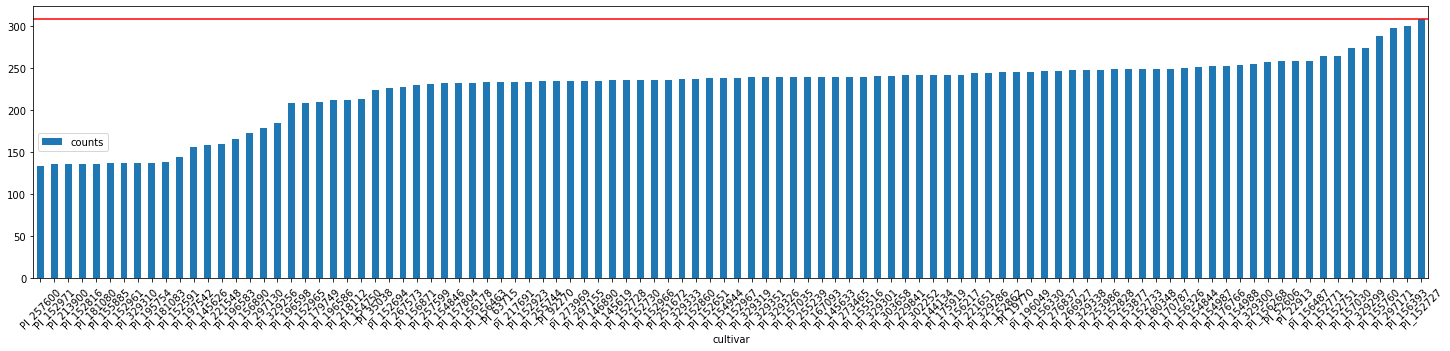

In [45]:
ax = counts.sort_values(by='counts').plot.bar(x='cultivar', y='counts', rot=45, figsize=(25,5)).axhline(y=308, color='r', linestyle='-')


This is actually a bad idea because this is later divided into training and validation datasets, and the two sets may contain overlaps. Better way to handle this is to use a sampler in the `DataLoader`.